In [8]:
# Import necessary libraries
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (adjust the file path as necessary)
df = pd.read_csv('/content/drive/MyDrive/Dataset/StudentsPerformance.csv')

df.columns = df.columns.str.strip().str.replace(' ', '_')

# Check the first few rows of the dataset to understand its structure
print(df.head())

# Summary statistics to understand the data better
print(df.describe())

# Check for any missing values
print(df.isnull().sum())


   gender race/ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
       math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.163

**2. Defining Hypotheses**

For one-way ANOVA, let's compare math scores across different parental education levels.

Null Hypothesis (H₀): There is no significant difference in math scores across different levels of parental education.
Alternative Hypothesis (H₁): There is a significant difference in math scores across at least one level of parental education.
For two-way ANOVA, we can include two factors, say gender and lunch type, to study their effects on math scores.

**3. One-Way ANOVA (Parental Education Level vs Math Scores)**

In [9]:
# ONE-WAY ANOVA: Parental Education Level vs Math Scores
df['parental_level_of_education'] = df['parental_level_of_education'].astype('category')

anova_result = ols('math_score ~ C(parental_level_of_education)', data=df).fit()
anova_table = sm.stats.anova_lm(anova_result, typ=2)

# Output ANOVA table for one-way ANOVA
print("One-Way ANOVA Results (Parental Level of Education vs Math Scores):")
print(anova_table)

# Check if the p-value is less than 0.05 (significance level)
if anova_table['PR(>F)'][0] < 0.05:
    print("Reject the null hypothesis. There is a significant difference in math scores across parental education levels.")
else:
    print("Fail to reject the null hypothesis. No significant difference in math scores across parental education levels.")


One-Way ANOVA Results (Parental Level of Education vs Math Scores):
                                       sum_sq     df         F    PR(>F)
C(parental_level_of_education)    7295.561831    5.0  6.521583  0.000006
Residual                        222393.517169  994.0       NaN       NaN
Reject the null hypothesis. There is a significant difference in math scores across parental education levels.


<ipython-input-9-cf741bf1172d>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


The one-way ANOVA results for the effect of parental level of education on math scores are as follows:

F-value: 6.52

p-value (PR(>F)): 0.000006

Since the p-value is much smaller than 0.05, we reject the null hypothesis. This means there is a significant difference in math scores across different levels of parental education.

**4. Two-Way ANOVA (Gender and Lunch Type vs Math Scores**

In [11]:
# Two-way ANOVA: Effect of Gender and Lunch Type on Math Scores

# Ensure the columns are categorical
df['gender'] = df['gender'].astype('category')
df['lunch'] = df['lunch'].astype('category')

two_way_anova_result = ols('math_score ~ C(gender) + C(lunch) + C(gender):C(lunch)', data=df).fit()
two_way_anova_table = sm.stats.anova_lm(two_way_anova_result, typ=2)

# Output ANOVA table for two-way ANOVA
print("Two-Way ANOVA Results (Gender and Lunch vs Math Scores):")
print(two_way_anova_table)

# Interpretation based on p-values for gender, lunch, and their interaction
if two_way_anova_table['PR(>F)'][0] < 0.05:
    print("Gender has a significant effect on math scores.")
if two_way_anova_table['PR(>F)'][1] < 0.05:
    print("Lunch type has a significant effect on math scores.")
if two_way_anova_table['PR(>F)'][2] < 0.05:
    print("There is a significant interaction effect between gender and lunch type on math scores.")


Two-Way ANOVA Results (Gender and Lunch vs Math Scores):
                           sum_sq     df           F        PR(>F)
C(gender)             5918.328759    1.0   30.219323  4.902280e-08
C(lunch)             27714.992744    1.0  141.514328  1.314908e-30
C(gender):C(lunch)     430.253550    1.0    2.196899  1.386050e-01
Residual            195062.458852  996.0         NaN           NaN
Gender has a significant effect on math scores.
Lunch type has a significant effect on math scores.


<ipython-input-11-91da2d6724b8>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if two_way_anova_table['PR(>F)'][0] < 0.05:
<ipython-input-11-91da2d6724b8>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if two_way_anova_table['PR(>F)'][1] < 0.05:
<ipython-input-11-91da2d6724b8>:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if two_way_anova_table['PR(>F)'][2] < 0.05:


The two-way ANOVA results for the effect of gender and lunch type on math scores are as follows:

**Gender:**

F-value: 30.22
p-value:
4.90 * 10 pow -8

Conclusion: Gender has a significant effect on math scores.

**Lunch Type:**

F-value: 141.51

p-value:
1.31 * 10 pow -30

**Conclusion:** Lunch type (standard or free/reduced) has a significant effect on math scores.

**Interaction between Gender and Lunch:**

F-value: 2.20

p-value: 0.14

**Conclusion:** The interaction between gender and lunch type does not have a statistically significant effect on math scores (since p-value > 0.05).

**Summary of Findings:**

Both gender and lunch type have significant effects on student math scores.

The interaction between these two factors does not significantly impact math scores.

**5. Visualization**

To better understand the results, we can visualize the data with boxplots or barplots

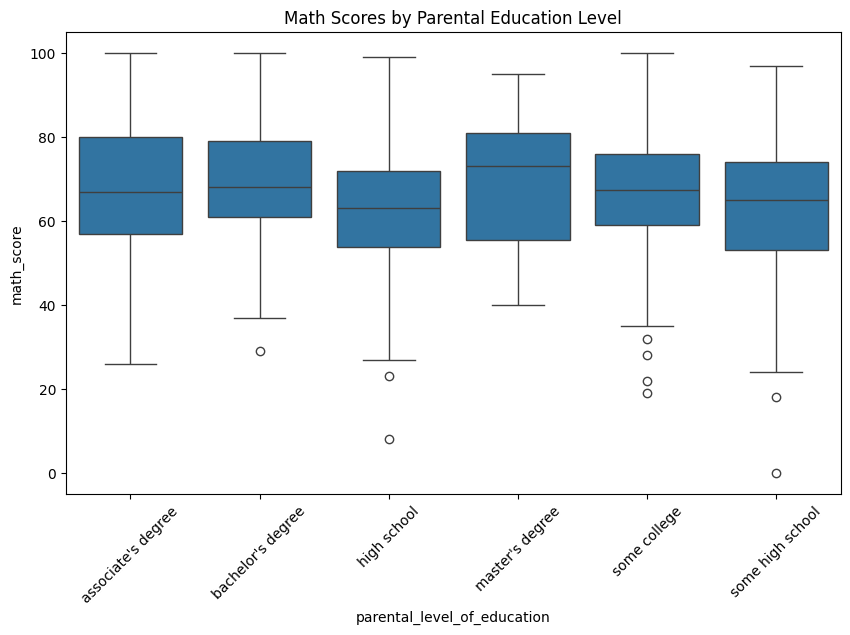

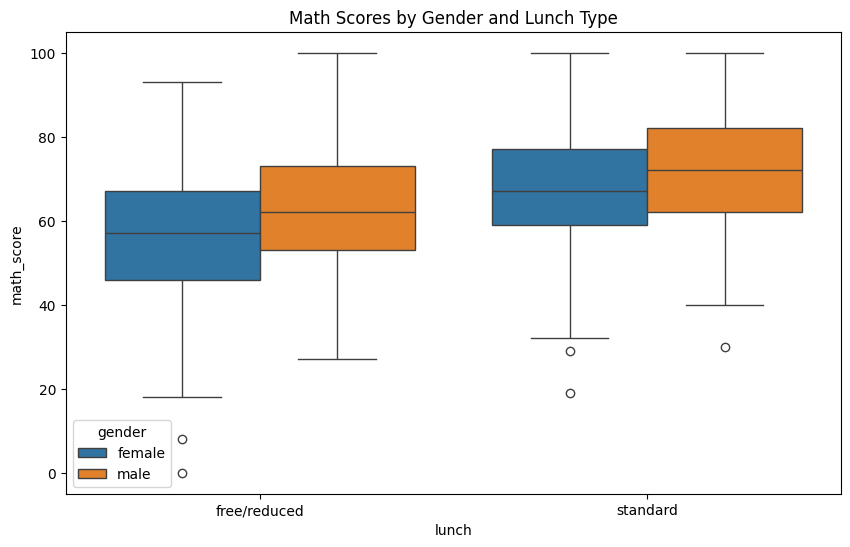

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='parental_level_of_education', y='math_score', data=df)
plt.title('Math Scores by Parental Education Level')
plt.xticks(rotation=45)
plt.show()

# Boxplot for Two-Way ANOVA: Gender and Lunch vs Math Scores
plt.figure(figsize=(10, 6))
sns.boxplot(x='lunch', y='math_score', hue='gender', data=df)
plt.title('Math Scores by Gender and Lunch Type')
plt.show()

**Conclusion:**

 1. Based on One-Way ANOVA results, we found that the parental level of education significantly affects math scores.
    This suggests that parental education level plays a role in student performance in math.

 2. Based on Two-Way ANOVA results, we concluded that both gender and lunch type have significant effects on math scores.
    However, the interaction between gender and lunch type was not significant, meaning that the combined effect of these
    two factors on math scores is not significantly different from their individual effects.
